In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Arpitha
az-handwritten-alphabets-in-csv-format
digit-recognizer



In [2]:
#Load other modules
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
#To show graphs within the notebook
%matplotlib inline 


In [3]:
#load the datasets
train = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
test = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
#train = pd.read_csv("../input/digit-recognizer/test.csv")
#test = pd.read_csv(".../input/digit-recognizer/test.csv")


In [4]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 372450 observations and 785 variables
Testing dataset has 372450 observations and 785 variables


In [5]:
#check few rows
train.head()

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...    0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [6]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [7]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

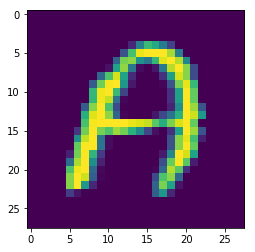

In [8]:
print_image(1, df_x)

In [9]:
print_image(2, df_x)

In [10]:
print_image(3, df_x)

In [11]:
#Check the frequency of each number
df_y.value_counts().sort_index()

0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
Name: 0, dtype: int64

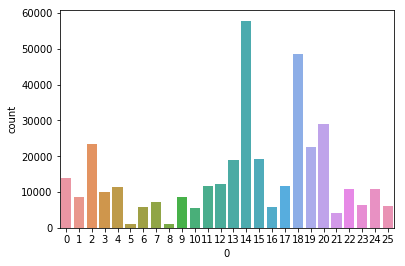

In [12]:
sns.countplot(df_y)

In [13]:
#plt.figure(figsize=(5,25))
#for i in range(40):
   # plt.subplot(4, 10, i+1)
    #print_image(i, test)

In [14]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
len(X_train)
len(X_test)

(260715, 784)
(111735, 784)


111735

In [15]:
#training random Forest
rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      4203
          1       0.98      0.95      0.97      2657
          2       0.98      0.99      0.99      7048
          3       0.97      0.95      0.96      3004
          4       0.97      0.97      0.97      3403
          5       1.00      0.92      0.96       351
          6       0.98      0.95      0.96      1736
          7       0.97      0.93      0.95      2173
          8       1.00      0.96      0.98       350
          9       0.98      0.96      0.97      2538
         10       0.97      0.96      0.96      1650
         11       0.98      0.99      0.99      3459
         12       0.98      0.97      0.97      3688
         13       0.97      0.99      0.98      5776
         14       0.98      1.00      0.99     17484
         15       0.99      0.99      0.99      5802
         16       0.99      0.93      0.96      1815
         17       0.99 

The accuracy is 96%

In [ ]:
#Cross validation
rf=RandomForestClassifier(n_estimators=100)
rf.fit(df_x, df_y)
score = cross_val_score(rf, df_x, df_y)
print (np.mean(score))

In [ ]:
#Predicting on test data
pred= rf.predict(test)

In [ ]:
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)